# The Sparks Foundation - GRIP - Data Science and Business Analytics

# Author: TANYA JAIN

# March 2022

# TASK 6 : Prediction using Decision Tree Algorithm

The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly, using the iris dataset

** Importing required libraries **

In [1]:
# Importing the necessary libraries required in this notebook
import pandas as pd   # Library for Data Manipulation and Analysis.
import numpy as np   # Library for scientific computing. It is an array-processing package.
import seaborn as sns   # Library for making statistical graphics
import matplotlib.pyplot as plt   # Library for Data Visualization.
%matplotlib inline
import warnings   # To ignore warnings
warnings.filterwarnings("ignore")

** Reading in the data **

In [2]:
url = "https://rb.gy/mjpuvp"
iris = pd.read_csv(url)
# Basic data exploration
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Iris_data contain total 6 features in which 4 features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable. And Id column is like serial number for each data points.

In [5]:
# With “Iris_data.describe()” function we get some numerical information like Total datapoints count, mean value,etc.
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


** Visualizing the data **

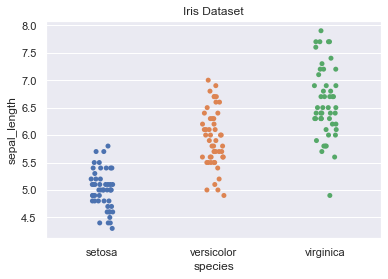

In [7]:
# Using Strip Plot to draw a scatter plot based on the category
sns.set(style = 'darkgrid')
iris1 = sns.load_dataset('iris');
ax = sns.stripplot(x ='species', y ='sepal_length', data = iris1);
plt.title('Iris Dataset')
plt.show()

As we saw that each classes (Species) has equal number of data points, So our Iris data said to be Balanced dataset.

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

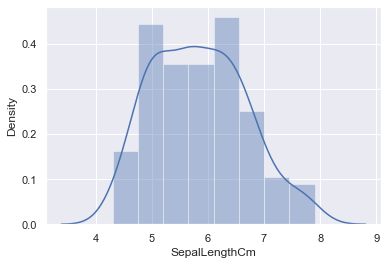

In [8]:
sns.distplot(iris['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

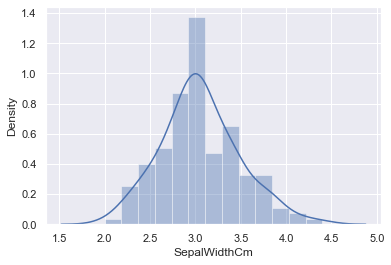

In [9]:
sns.distplot(iris['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

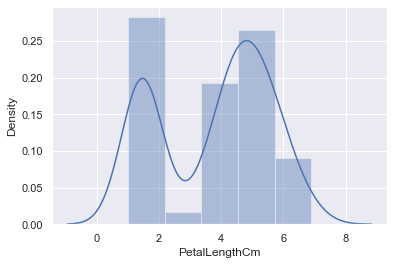

In [10]:
sns.distplot(iris['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

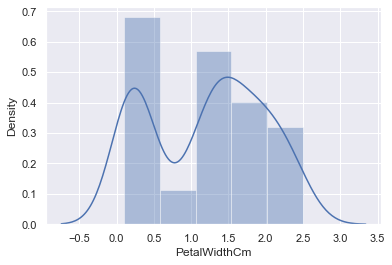

In [11]:
sns.distplot(iris['PetalWidthCm'])

<AxesSubplot:>

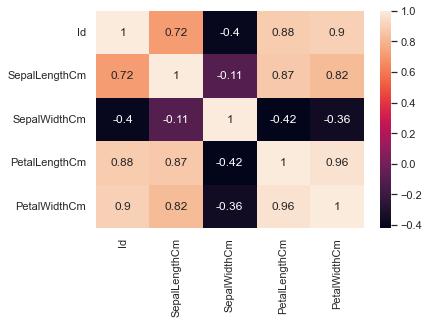

In [12]:
# Correlation plot
sns.heatmap(iris.corr(), annot = True)

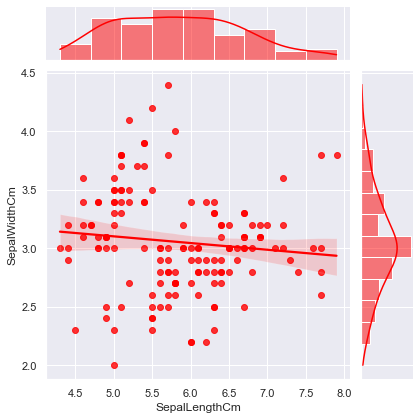

In [13]:
# Using Joint Plot to visualize & analyze relationship between 2 variables & describing individual distributions on same plot.
sns.jointplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", kind="reg", color='red')

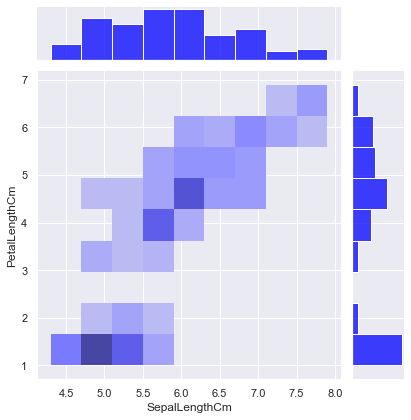

In [14]:
sns.jointplot(data=iris, x="SepalLengthCm", y="PetalLengthCm", kind="hist", color='blue')

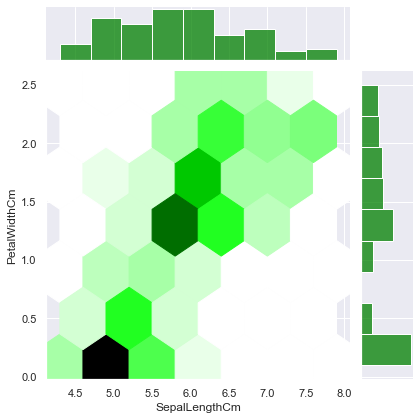

In [15]:
sns.jointplot(data=iris, x="SepalLengthCm", y="PetalWidthCm", kind="hex", color='green')

Observation: Darker Hexagons refer to Higher Concentration & Lighter Hexagons refer to Lower Concentration

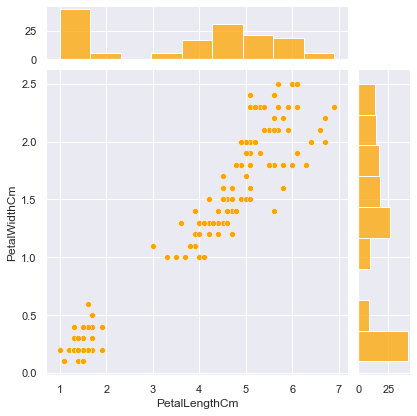

In [17]:
sns.jointplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", marginal_ticks=True, color='orange')

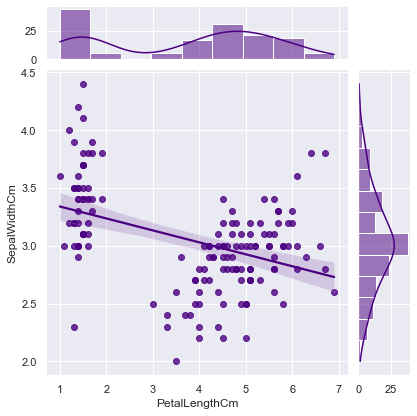

In [18]:
sns.jointplot(data=iris, x="PetalLengthCm", y="SepalWidthCm", kind='reg', marginal_ticks=True, color='indigo')

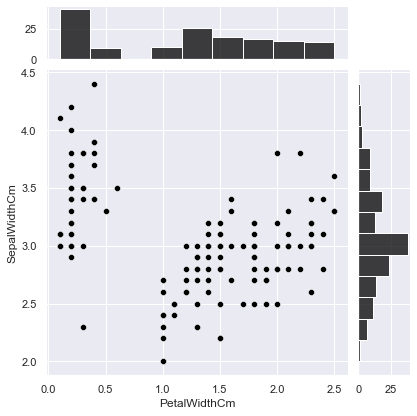

In [19]:
sns.jointplot(data=iris, x="PetalWidthCm", y="SepalWidthCm", marginal_ticks=True, color='black')

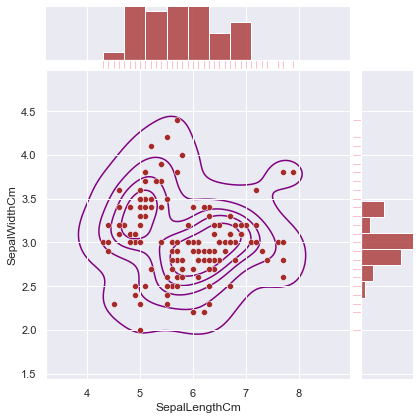

In [20]:
# Using KDE plot to plot the data against a single/univariate variable.
# Using Rug plot to draw small bars along x-axis for each point in the dataset.
# jp is an acronym for Joint Plot
jp = sns.jointplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", color='brown')
jp.plot_joint(sns.kdeplot, color="purple", zorder=0, levels=6)
jp.plot_marginals(sns.rugplot, color="pink", height=-.15, clip_on=False)

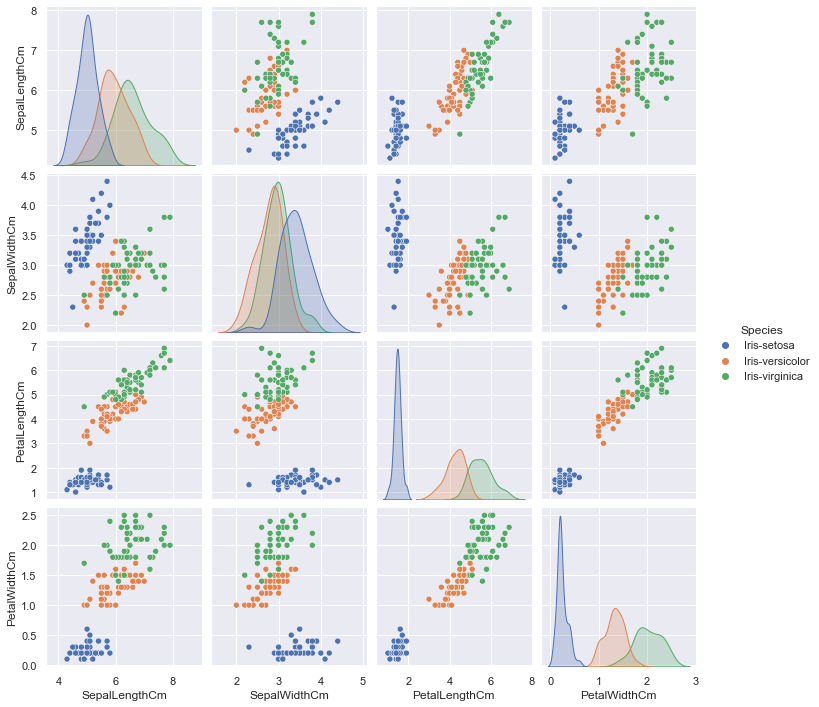

In [21]:
sns.pairplot(iris.drop(['Id'], axis = 1), hue = 'Species')

Observation: Clusters of Species 'versicolor' and 'virginica' are closely related, whereas 'setosa' is more distinct.

By looking the result of pair plot we sure that all blue points are well separated with other two classes. But Versicolor and virginica are partially overlapping with each other. In pair plot we saw that there are some feature combination which has very less overlapping b/w Versicolor and virginica, that’s means those feature are very important for our classification task purpose.

** Feature Engineering **

In [23]:
# Here I just try to find some new feature with the help of existing features. 
# Taking difference of each feature with each other to get some more information and visualized it by using plots.
iris['SepalDiffCm'] = iris['SepalLengthCm'] - iris['SepalWidthCm']
iris['PetalDiffCm'] = iris['PetalLengthCm'] - iris['PetalWidthCm']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalDiffCm,PetalDiffCm
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1


In [24]:
iris['SepalPetalLenDiff'] = iris['SepalLengthCm'] - iris['PetalLengthCm']
iris['SepalPetalWidthDiff'] = iris['SepalWidthCm'] - iris['PetalWidthCm']
iris['SepalPetalLenWidthDiff'] = iris['SepalLengthCm'] - iris['PetalWidthCm']
iris['SepalPetalWidthLenDiff'] = iris['SepalWidthCm'] - iris['PetalLengthCm']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalDiffCm,PetalDiffCm,SepalPetalLenDiff,SepalPetalWidthDiff,SepalPetalLenWidthDiff,SepalPetalWidthLenDiff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


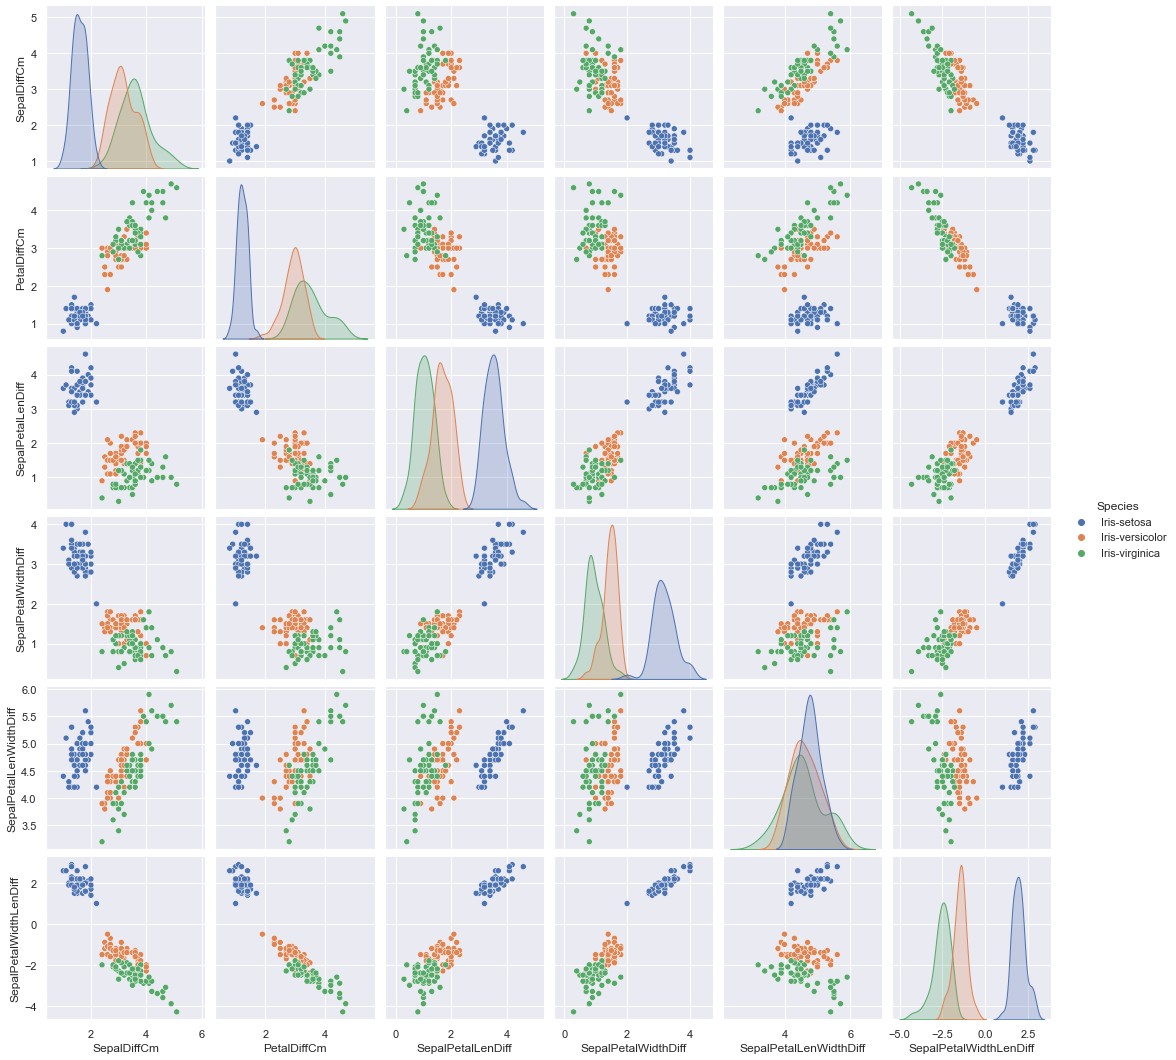

In [25]:
sns.pairplot(iris[['Species','SepalDiffCm','PetalDiffCm','SepalPetalLenDiff','SepalPetalWidthDiff','SepalPetalLenWidthDiff',
                   'SepalPetalWidthLenDiff']], hue = 'Species')

With help of Pair plot we are getting some new information but it is more likely similar with our main data features as we saw earlier. Every combination well separate the Iris-setosa but has some overlapped b/w Versicolor and virginica.

** Building Classification Model **

In [26]:
# Dropping id column as it is of no use in model
iris.drop(['Id'], axis = 1, inplace = True)

In [27]:
# Importing important libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [28]:
# Seperating dependent and independent variable
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','SepalPetalLenWidthDiff','SepalPetalWidthLenDiff']]
y = iris['Species']

In [29]:
# Splitting our data into training, testing and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
#splitting data into validation train and validation test set
Xt,Xcv,yt,ycv = train_test_split(X_train,y_train,test_size = 0.1, random_state = 42)

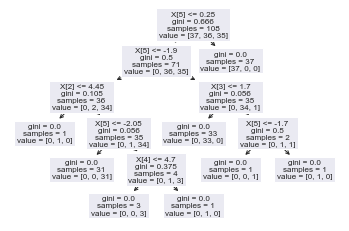

In [30]:
# Creating decision tree classifier and training it with training set
dtr = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2)
dtr.fit(Xt,yt)

# Visualizing the tree which is formed on training set
tree.plot_tree(dtr)
plt.rcParams['figure.figsize']=(20,20)

** Feeding a new data to predict the class **

In [31]:
# Testing our model on a random test case
# Predicted label should be Iris-virginica
trial = np.array([[7.2,3.0,5.8,1.6,5.6,-2.8]]) 
pred_trial = dtr.predict(trial)
pred_trial

array(['Iris-virginica'], dtype=object)

** Visualisation of the Decision Tree **

In [33]:
# As our model has been trained….
# Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.
print('Accuracy: ', cross_val_score(dtr , Xt , yt , cv = 3 , scoring = 'accuracy').mean())

Accuracy:  0.9259259259259259


In [34]:
# Checking validation test data on our trained model and getting performance metrics
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score
y_hat = dtr.predict(Xcv)

print('Accuracy of validation test data is:', accuracy_score(ycv,y_hat))
multilabel_confusion_matrix(ycv,y_hat)

Accuracy of validation test data is: 0.8333333333333334


array([[[9, 0],
        [0, 3]],

       [[7, 0],
        [2, 3]],

       [[6, 2],
        [0, 4]]], dtype=int64)

In [35]:
# Checking model performance on unseen test data
yt_hat = dtr.predict(X_test)
yt_hat

print('Accuracy score for unseen test data is:',accuracy_score(y_test,yt_hat)*100,'%' )
multilabel_confusion_matrix(y_test,yt_hat)

Accuracy score for unseen test data is: 96.66666666666667 %


array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 1,  8]],

       [[18,  1],
        [ 0, 11]]], dtype=int64)

In [36]:
target = list(iris.Species.unique())
target

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

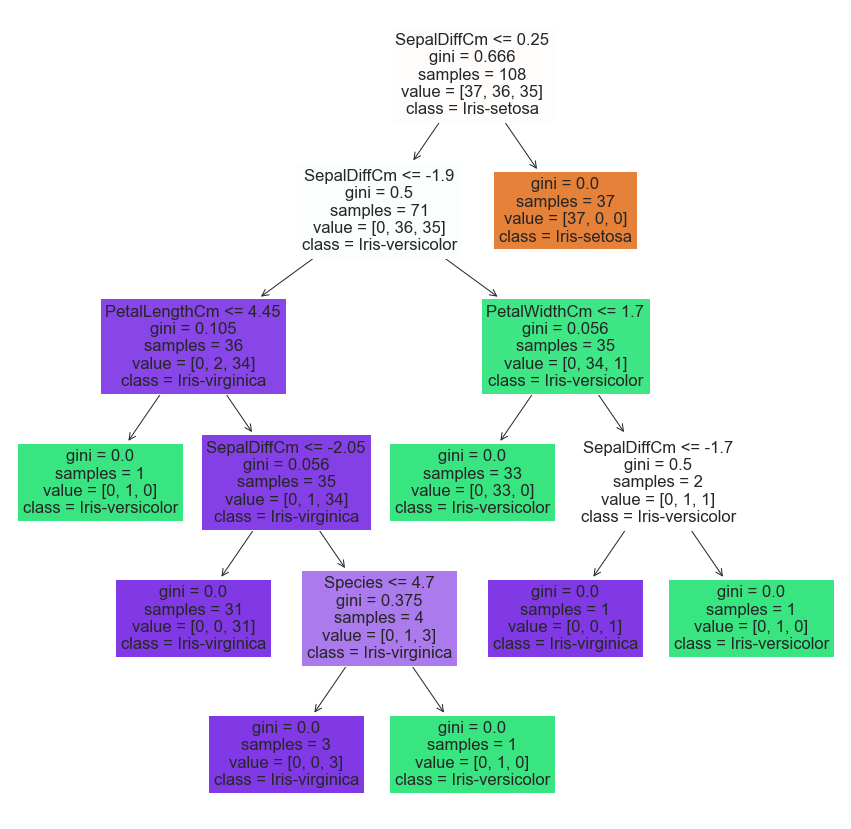

In [37]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(dtr, feature_names=iris.columns, class_names=target, filled=True)
plt.rcParams['figure.figsize']=(15,15)

# Thank You